# Tiền xử lý



## Thêm thư viện

In [ ]:
install.packages("arules")
install.packages("arulesViz")
library(arules)
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




## Nạp dữ liệu

In [ ]:
wine <- read.csv("winequality-red - Copy.csv")

In [ ]:
wine

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1     7.4          0.700            0.00        1.9            0.076    
2     7.8          0.880            0.00        2.6            0.098    
3     7.8          0.760            0.04        2.3            0.092    
4    11.2          0.280            0.56        1.9            0.075    
5     7.4          0.700            0.00        1.9            0.076    
6     7.4          0.660            0.00        1.8            0.075    
7     7.9          0.600            0.06        1.6            0.069    
8     7.3          0.650            0.00        1.2            0.065    
9     7.8          0.580            0.02        2.0            0.073    
10    7.5          0.500            0.36        6.1            0.071    
11    6.7          0.580            0.08        1.8            0.097    
12    7.5          0.500            0.36        6.1            0.071    
13    5.6          0.615            0.00        1.6            0.089    
14    7.8          0.610            0.29        1.6            0.114    
15    8.9          0.620            0.18        3.8            0.176    
16    8.9          0.620            0.19        3.9            0.170    
17    8.5          0.280            0.56        1.8            0.092    
18    8.1          0.560            0.28        1.7            0.368    
19    7.4          0.590            0.08        4.4            0.086    
20    7.9          0.320            0.51        1.8            0.341    
21    8.9          0.220            0.48        1.8            0.077    
22    7.6          0.390            0.31        2.3            0.082    
23    7.9          0.430            0.21        1.6            0.106    
24    8.5          0.490            0.11        2.3            0.084    
25    6.9          0.400            0.14        2.4            0.085    
26    6.3          0.390            0.16        1.4            0.080    
27    7.6          0.410            0.24        1.8            0.080    
28    7.9          0.430            0.21        1.6            0.106    
29    7.1          0.710            0.00        1.9            0.080    
30    7.8          0.645            0.00        2.0            0.082    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
1570 6.2           0.510            0.14         1.9           0.056    
1571 6.4           0.360            0.53         2.2           0.230    
1572 6.4           0.380            0.14         2.2           0.038    
1573 7.3           0.690            0.32         2.2           0.069    
1574 6.0           0.580            0.20         2.4           0.075    
1575 5.6           0.310            0.78        13.9           0.074    
1576 7.5           0.520            0.40         2.2           0.060    
1577 8.0           0.300            0.63         1.6           0.081    
1578 6.2           0.700            0.15         5.1           0.076    
1579 6.8           0.670            0.15         1.8           0.118    
1580 6.2           0.560            0.09         1.7           0.053    
1581 7.4           0.350            0.33         2.4           0.068    
1582 6.2           0.560            0.09         1.7           0.053    
1583 6.1           0.715            0.10         2.6           0.053    
1584 6.2           0.460            0.29         2.1           0.074    
1585 6.7           0.320            0.44         2.4           0.061    
1586 7.2           0.390            0.44         2.6           0.066    
1587 7.5           0.310            0.41         2.4           0.065    
1588 5.8           0.610            0.11         1.8           0.066    
1589 7.2           0.660            0.33         2.5           0.068    
1590 6.6           0.725            0.20         7.8           0.073    
1591 6.3           0.550            0.15         1.8           0.077    
1592 5.4           0.740            0.09         1.7           

## Rời rạc hóa các thuộc tính ( trừ quality)

In [ ]:
wine_disc <- as.data.frame(wine)

### Chuyển các cột số thành các nhãn phân loại với 3 mức: low, medium, high

In [ ]:
num_cols <- setdiff(names(wine_disc), "quality")
wine_disc[num_cols] <- lapply(wine_disc[num_cols], function(col) {
  cut(col, breaks = 3, labels = c("low", "medium", "high"), include.lowest = TRUE)
})


## Rời rạc hóa riêng cột quality

In [ ]:
wine_disc$quality <- cut(
  wine$quality,
  breaks = c(min(wine$quality), 5.5, 6.5, max(wine$quality)),
  labels = c("low", "medium", "high"),
  include.lowest = TRUE
)

## Chuyển đổi sang định dạng giao dịch (transactions)

In [ ]:
transactions_list <- lapply(1:nrow(wine_disc), function(i) {
  paste0(names(wine_disc), "=", as.character(wine_disc[i, ]))
})
trans <- as(transactions_list, "transactions")

## Kiểm tra xem các nhãn quality tồn tại chưa

In [ ]:
itemLabels(trans)[grep("quality", itemLabels(trans))]

[1] "quality=1" "quality=2" "quality=3"

## Huấn luyện mô hình Eclat


In [ ]:
frequent_items <- eclat(
  trans,
  parameter = list(supp = 0.05, maxlen = 5)
)

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.05      1      5 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 79 

create itemset ... 
set transactions ...[36 item(s), 1599 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating bit matrix ... [24 row(s), 1599 column(s)] done [0.00s].
writing  ... [7330 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [ ]:

cat("Số tập phổ biến tìm được:", length(frequent_items), "\n")
inspect(head(sort(frequent_items, by = "support", decreasing = TRUE), 10))

Số tập phổ biến tìm được: 7330 
     items                                        support   count
[1]  {chlorides=1}                                0.9756098 1560 
[2]  {residual.sugar=1}                           0.9631019 1540 
[3]  {chlorides=1, residual.sugar=1}              0.9405879 1504 
[4]  {sulphates=1}                                0.9268293 1482 
[5]  {total.sulfur.dioxide=1}                     0.9205754 1472 
[6]  {chlorides=1, sulphates=1}                   0.9168230 1466 
[7]  {chlorides=1, total.sulfur.dioxide=1}        0.8974359 1435 
[8]  {residual.sugar=1, total.sulfur.dioxide=1}   0.8930582 1428 
[9]  {residual.sugar=1, sulphates=1}              0.8918074 1426 
[10] {chlorides=1, residual.sugar=1, sulphates=1} 0.8836773 1413 


## Sinh luật kết hợp từ itemsets




In [ ]:
rules <- ruleInduction(frequent_items, trans, confidence = 0.6)

## Lọc luật có lift > 1.1 và loại bỏ luật trùng lặp

In [ ]:
rules <- subset(rules, lift > 1.1)
rules <- rules[!is.redundant(rules)]

cat("Số luật sau khi lọc:", length(rules), "\n")


Số luật sau khi lọc: 1759 


## Trực quan hóa luật


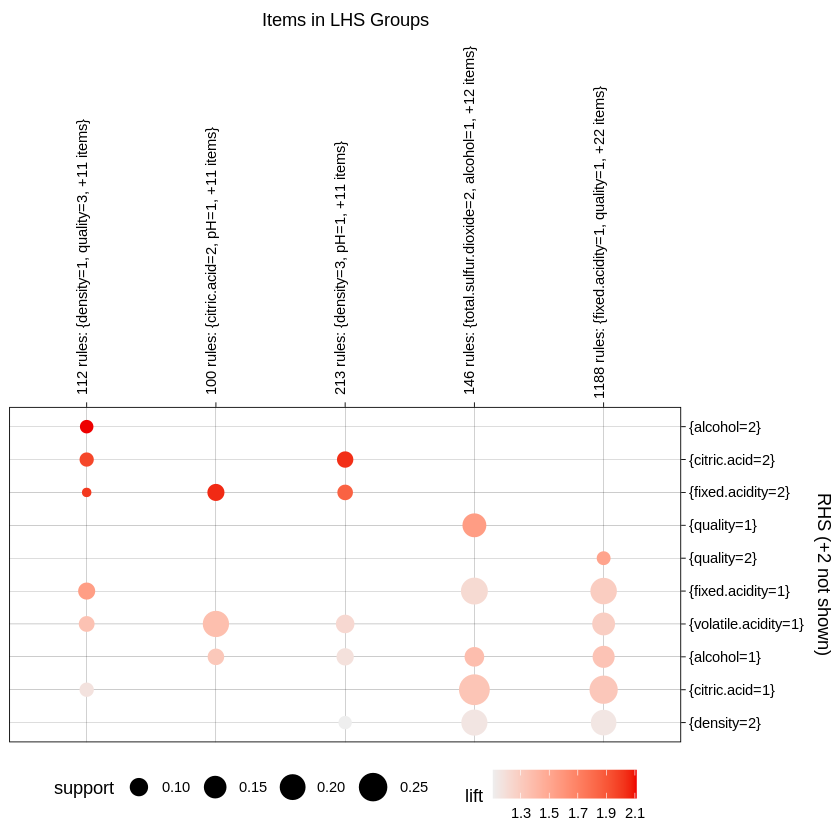

In [ ]:

plot(rules, method = "grouped", control = list(k = 5))


Warning message:
“Unknown control parameters: main”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


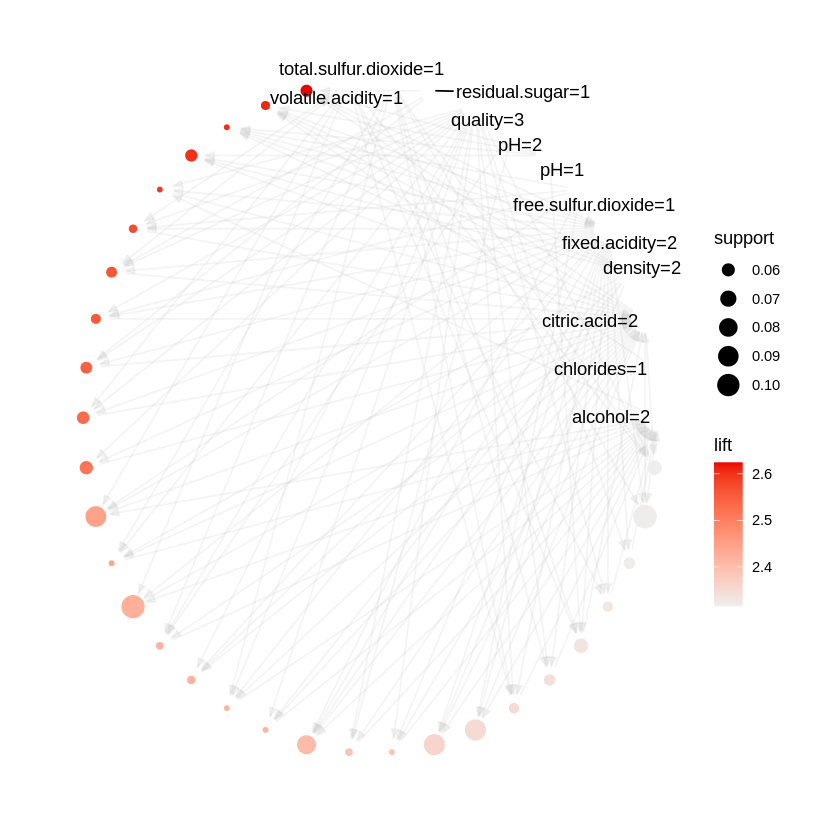

In [ ]:
# Plot dạng graph (top 30 luật theo lift)
plot(head(sort(rules, by = "lift"), 30),
     method = "graph",
     control = list(layout = "circle"),
     main = "Top 30 luật từ FP-Growth")

## In top 5 luật mạnh nhất

In [ ]:
inspect(head(sort(rules, by = "lift"), 5))

    lhs                         rhs                  support confidence     lift itemset
[1] {citric.acid=2,                                                                     
     density=2,                                                                         
     pH=1,                                                                              
     residual.sugar=1}       => {fixed.acidity=2} 0.05753596  0.9387755 2.624304    1018
[2] {chlorides=1,                                                                       
     citric.acid=2,                                                                     
     density=2,                                                                         
     pH=1}                   => {fixed.acidity=2} 0.05253283  0.9333333 2.609091    1017
[3] {citric.acid=2,                                                                     
     density=2,                                                                         
     free.sulfur.diox